In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Importing data for training and testing

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
print(train_data)
print(test_data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

## Visualizing survival based on socio-economic status (Pclass)

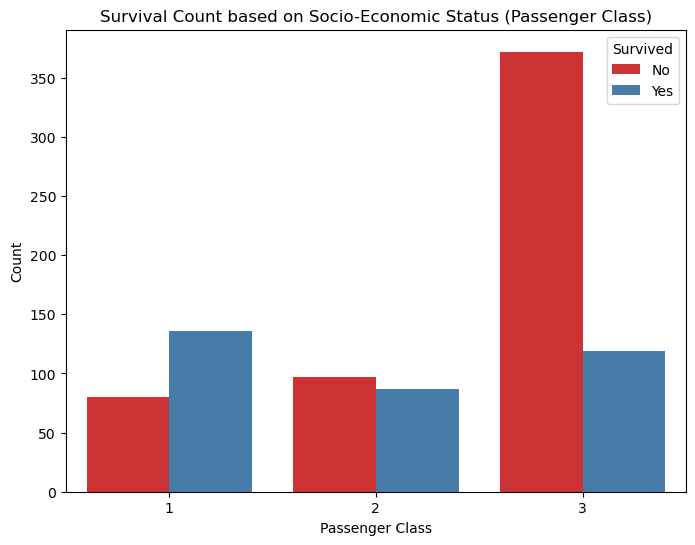

In [4]:
plt.figure(figsize=(8,6))
sns.countplot(x="Pclass",hue='Survived', data=train_data, palette='Set1')
plt.title('Survival Count based on Socio-Economic Status (Passenger Class)')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

## Visualizing survival data based on age

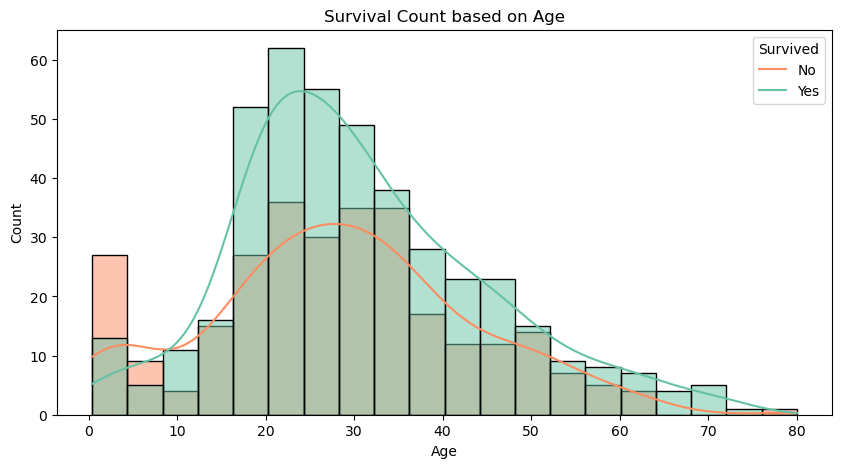

In [5]:
plt.figure(figsize=(10, 5))
sns.histplot(x='Age', hue='Survived', data=train_data, kde=True, palette='Set2')
plt.title('Survival Count based on Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

## Visualizing survival data based on gender

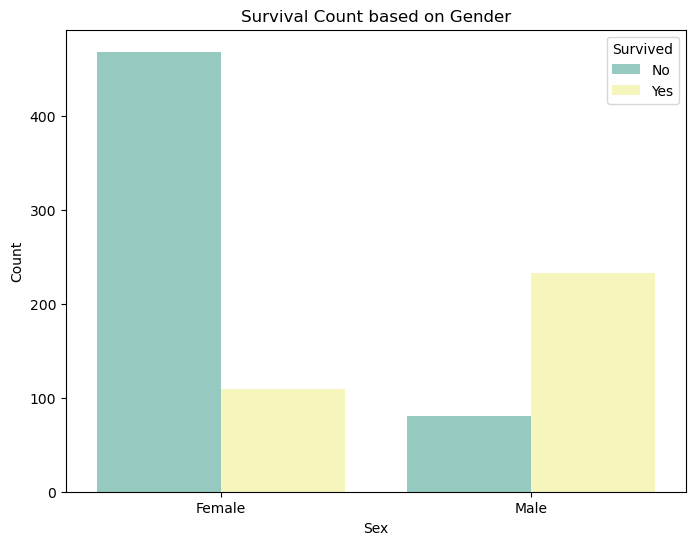

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=train_data, palette='Set3')
plt.title('Survival Count based on Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

## Visualizing survival data based on number of parents/children aboard (Parch)

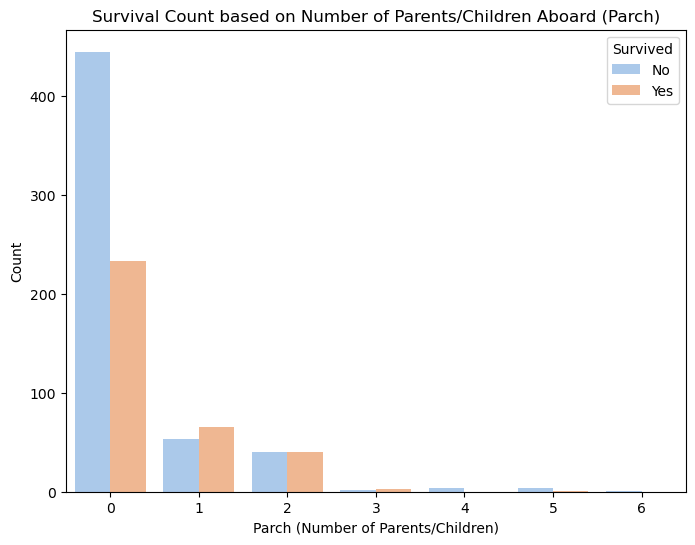

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Parch', hue='Survived', data=train_data, palette='pastel')
plt.title('Survival Count based on Number of Parents/Children Aboard (Parch)')
plt.xlabel('Parch (Number of Parents/Children)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


## Visualizing survival data based on number of siblings/spouses aboard (SibSp)

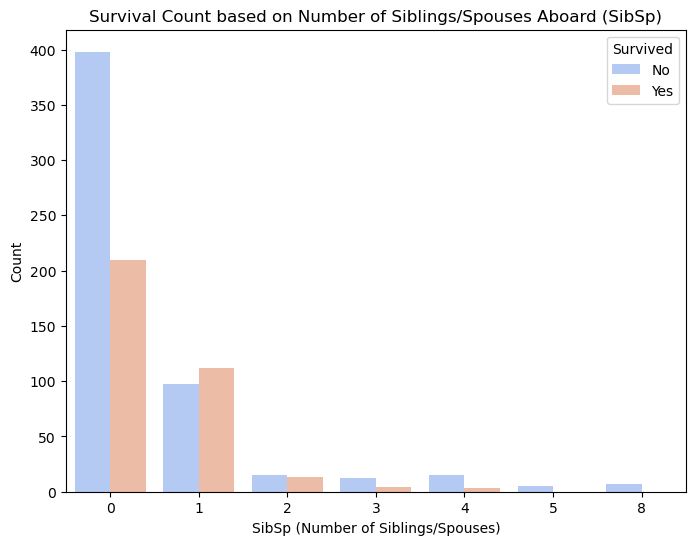

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='SibSp', hue='Survived', data=train_data, palette='coolwarm')
plt.title('Survival Count based on Number of Siblings/Spouses Aboard (SibSp)')
plt.xlabel('SibSp (Number of Siblings/Spouses)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

In [9]:
# Droping columns that are not useful for our prediction
train_data = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

## Handling missing values from both training and testing data 

In [10]:
# Handle missing values for training data
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Handle missing values for testing data
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

## Converting categorical values to numerical values in both training and testing data

In [11]:
# converting the categorical values to numerical values for training data 
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'])

# converting the categorical values to numerical values for testing data
test_data['Sex'] = label_encoder.fit_transform(test_data['Sex'])
test_data['Embarked'] = label_encoder.fit_transform(test_data['Embarked'])

## spliting the testing and training set

In [12]:
# Droping survived from X and allocate it in y variable
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']
# Split the training data into training and testing sets(70% tarining data and testing data 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Importing random Forest Classifier

In [13]:
# Create the Random Forest Classifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Predicted accuracy value and confusion matrix 

In [14]:
y_prediction= model.predict(X_test) 

In [15]:
# accuracy score
accuracy = accuracy_score(y_test, y_prediction)
accuracy

0.7835820895522388

In [16]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_prediction)
conf_matrix

array([[132,  25],
       [ 33,  78]], dtype=int64)